<a href="https://colab.research.google.com/github/abhaswanchu1/mids-281-final-project-cars/blob/Abhas-Work/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Decision Tree with PCA Feature Set

In [ ]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
##############################################################################################
########################  Load Images  ########################################################
##############################################################################################
# Load the train and test data
X_train_pca = np.load(r"drive/MyDrive/X.npy")
X_test_pca = np.load(r"drive/MyDrive/X_test.npy")
Y_train = np.load(r"drive/MyDrive/targets.npy")
Y_test = np.load(r"drive/MyDrive/test_targets.npy")
X_train = np.load(r'drive/MyDrive/stacked_features.npy')
X_test = np.load(r'drive/MyDrive/stacked_features_test.npy')


In [ ]:
class_names = ['Audi','BMW','Cheverolet','Dodge']
# Assuming you have already extracted features (e.g., hog_features) and stored them in a variable called 'X_train_pca'
# and have the corresponding target labels in 'train_targets'
import time
# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters if needed

# Train the classifier
start_time = time.time()
tree_classifier.fit(X_train_pca,Y_train )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 24.689502954483032 seconds


In [ ]:
train_predictions = tree_classifier.predict(X_train_pca)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Weighted F1-score: 1.0
Confusion Matrix:
[[1572    0    0    0]
 [   0 1434    0    0]
 [   0    0 2370    0]
 [   0    0    0 1684]]


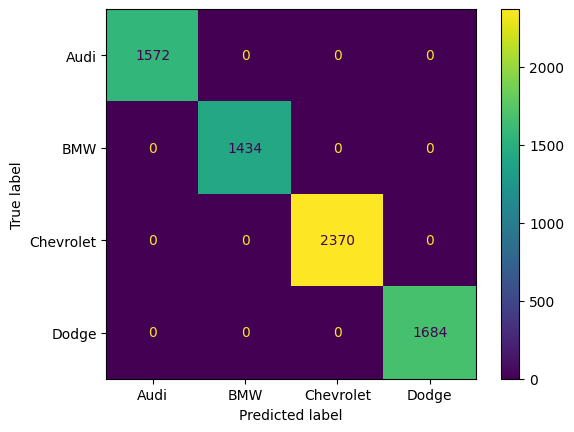

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_train, train_predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(Y_train, train_predictions, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(Y_train, train_predictions, average='weighted')
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(Y_train, train_predictions, average='weighted')
print(f"Weighted F1-score: {f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_train, train_predictions)
print(f"Confusion Matrix:\n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(Y_test))
disp.plot()
plt.show()

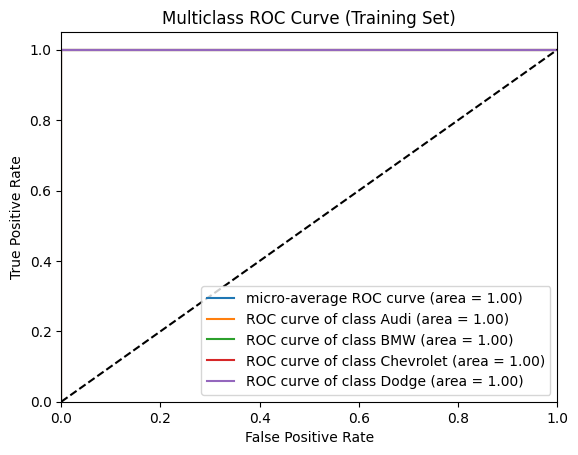

In [ ]:
# Binarize the output
y_train_bin = label_binarize(Y_train, classes=np.unique(Y_train))
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = y_train_bin.shape[1]

# Get predicted probabilities for each class
y_train_score = tree_classifier.predict_proba(X_train_pca)
y_test_score = tree_classifier.predict_proba(X_test_pca)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_train_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_train_bin.ravel(), y_train_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for training set
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_train)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Training Set)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.33972240581625907
Precision: 0.3315290643130149
Recall: 0.33972240581625907
Weighted F1-score: 0.3338020962108391
Confusion Matrix:
[[201 138 212 123]
 [127 160 201 126]
 [129 149 505 233]
 [137 121 302 162]]


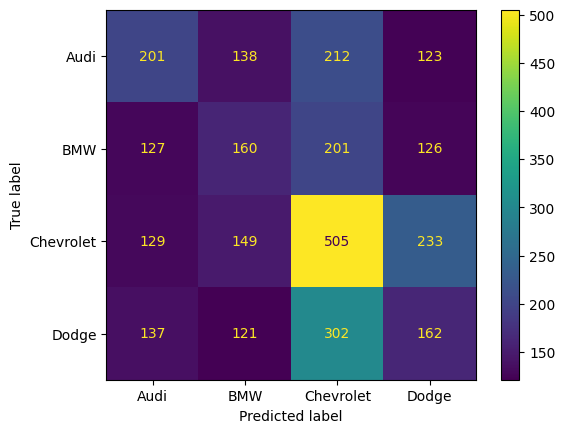

In [ ]:
# Make predictions on the test set
test_predictions = tree_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(Y_test, test_predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(Y_test, test_predictions, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(Y_test, test_predictions, average='weighted')
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(Y_test, test_predictions, average='weighted')
print(f"Weighted F1-score: {f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, test_predictions)
print(f"Confusion Matrix:\n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(Y_test))
disp.plot()
plt.show()

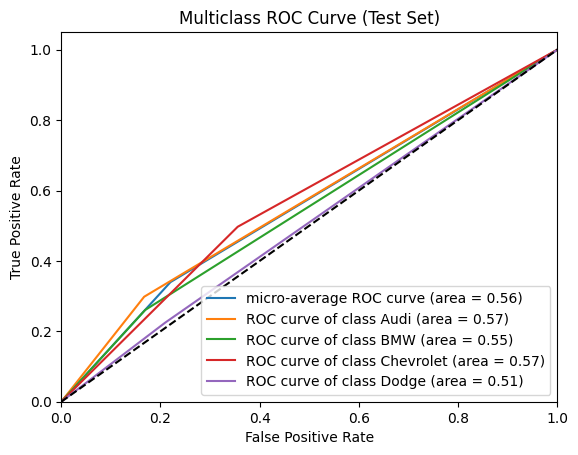

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
#y_test_bin = label_binarize(test_targets, classes=np.unique(test_targets))
n_classes = y_test_bin.shape[1]

# Get predicted probabilities for each class
#y_test_score = tree_classifier.predict_proba(X_test_pca) # Assuming 'tree_classifier' is your trained model

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_test_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for test set
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_test)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()

##Decision Trees with Full Feature Set

In [ ]:

# Assuming you have already extracted features (e.g., hog_features) and stored them in a variable called 'X_train'
# and have the corresponding target labels in 'train_targets'

# Create a decision tree classifier
tree_classifier_full = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters if needed

# Train the classifier
start_time = time.time()
tree_classifier_full.fit(X_train,Y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")
train_predictions = tree_classifier_full.predict(X_train)

Training time: 827.4023215770721 seconds


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Weighted F1-score: 1.0
Confusion Matrix:
[[1572    0    0    0]
 [   0 1434    0    0]
 [   0    0 2370    0]
 [   0    0    0 1684]]


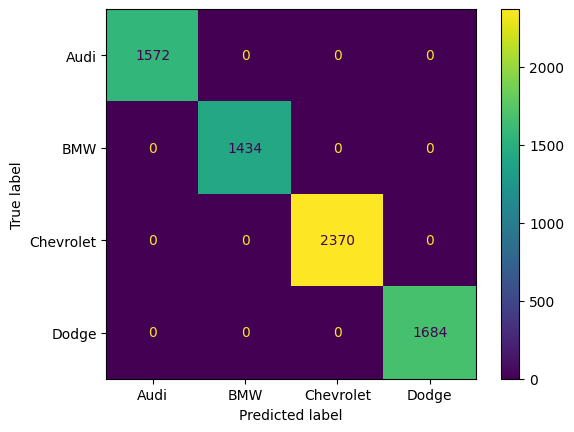

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_train, train_predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(Y_train, train_predictions, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(Y_train, train_predictions, average='weighted')
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(Y_train, train_predictions, average='weighted')
print(f"Weighted F1-score: {f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_train, train_predictions)
print(f"Confusion Matrix:\n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(Y_test))
disp.plot()
plt.show()

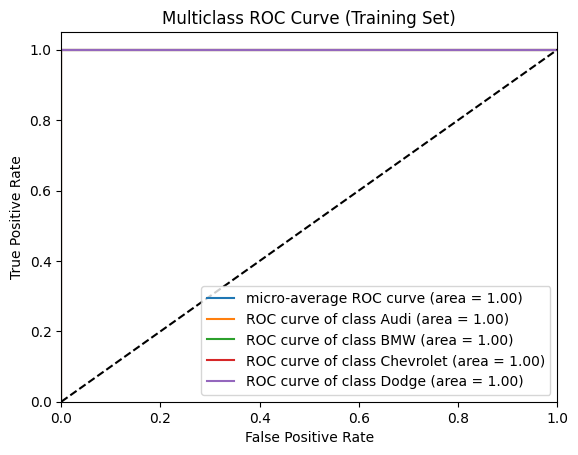

In [ ]:
# Binarize the output
y_train_bin = label_binarize(Y_train, classes=np.unique(Y_train))
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = y_train_bin.shape[1]

# Get predicted probabilities for each class
y_train_score = tree_classifier_full.predict_proba(X_train)
y_test_score = tree_classifier_full.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_train_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_train_bin.ravel(), y_train_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for training set
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_train)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Training Set)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.3073364177131527
Precision: 0.3093217220570194
Recall: 0.3073364177131527
F1-score: 0.3082244763183319
Confusion Matrix:
[[187 118 190 179]
 [140 162 165 147]
 [195 198 386 237]
 [162 134 231 195]]


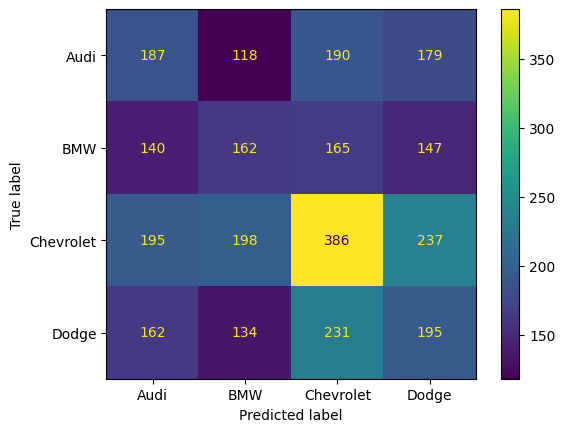

In [ ]:
# Make predictions on the test set
test_predictions = tree_classifier_full.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, test_predictions)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(Y_test, test_predictions, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(Y_test, test_predictions, average='weighted')
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(Y_test, test_predictions, average='weighted')
print(f"F1-score: {f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, test_predictions)
print(f"Confusion Matrix:\n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(Y_test))
disp.plot()
plt.show()

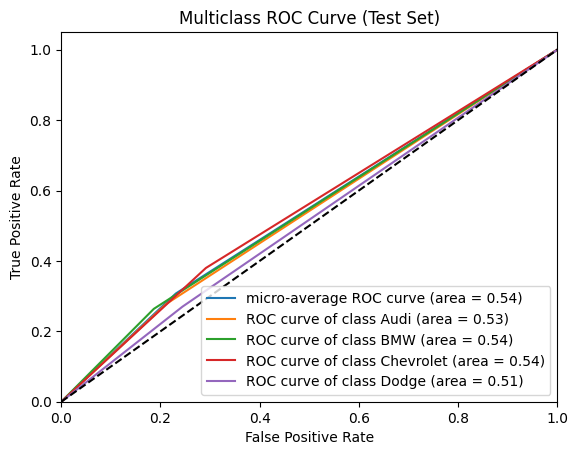

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
n_classes = y_test_bin.shape[1]


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_test_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for test set
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_test)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Test Set)')
plt.legend(loc="lower right")
plt.show()